# KNN Implementation

In [15]:
#===================paremeter tunning using cv================#
ls = list(range(20))
# Each iteration takes more than one hour, so I only searched odd number of neighbors 
# to save some computation time
neighbors = [num for num in ls if num % 2 == 1]
cv_score = []
for k in neighbors:
    model_knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model_knn, X_trainFlat, 
                             Y_train, cv=5, scoring='accuracy')
    cv_score.append(scores.mean())
    print("done")
print(cv_score)   

done
done
done
done
done
done
done
done
done
done
[0.42236758266740465, 0.35184045105634815, 0.3500377319391626, 0.34033038353445766, 0.33320709509576918, 0.33015462435283988, 0.33093970068014406, 0.32412774743237932, 0.3258504736542624, 0.32256246475353789]


19

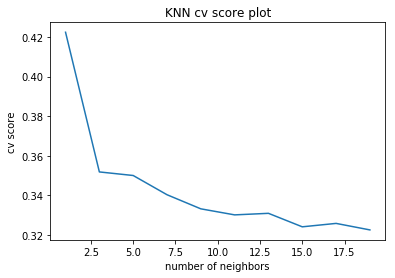

In [33]:
# ====================== cv score plot ====================== #
plt.plot(neighbors, cv_score)
plt.xlabel('number of neighbors')
plt.ylabel('cv score')
plt.title('KNN cv score plot')
optimal_k = neighbors[cv_score.index(min(cv_score))]
optimal_k

In [31]:
# fit model and get accuracy score using optimum k. 
neighbors = optimal_k
model_knn = KNeighborsClassifier(n_neighbors = neighbors)
model_knn.fit(X_trainFlat, Y_train)
pred = model_knn.predict(X_testFlat)
print(metrics.accuracy_score(Y_test, pred))

0.475819032761


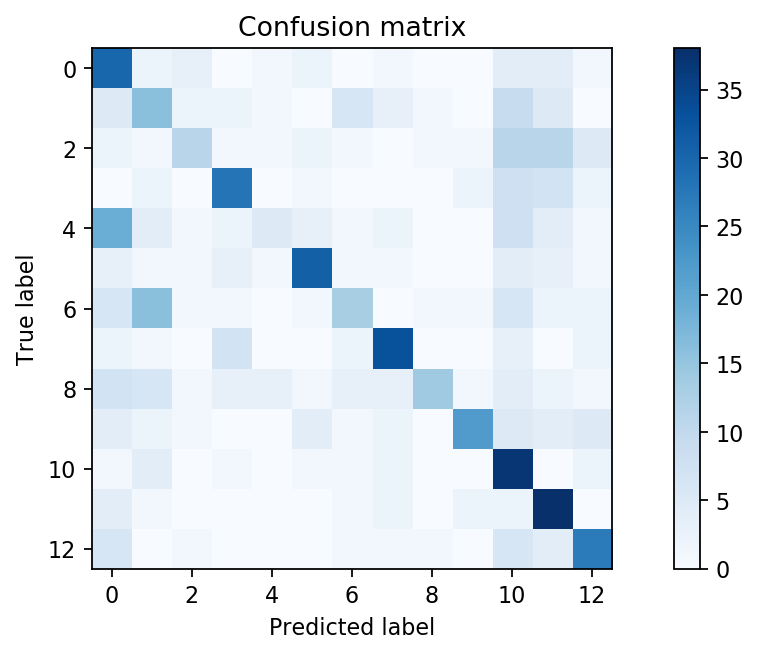

In [42]:
# plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(1, figsize=(8,4), dpi=160)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

knn_cm = metrics.confusion_matrix(Y_test, pred)   
plot_confusion_matrix(knn_cm)